In [1]:
import os
import matplotlib
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
DOE_NAME = "doe4"
factors = ["max_time", "batch_size", "seq_len", "seq_est_len",  "est_type"]
response = "FIT"

In [3]:
df_res = pd.read_csv(DOE_NAME + "_res.csv")  # doe1_res.csv

In [4]:
df_res.sort_values(by=response, inplace=True, ascending=False)
df_res["RMSE"] = df_res["RMSE"].fillna(1000)
#df_res["FIT"] = df_res["FIT"] * (df_res["FIT"] > 0) # minimum fit to 0% (easier to interpret)
df_res["FIT"] = df_res["FIT"].fillna(np.min(df_res["FIT"])-0.1)

In [5]:
for factor in factors:
    df_res[factor] = df_res[factor].astype("category")

In [6]:
df_res.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
283,53,0.001,10000,1800,128,80,40,forward,LSTM,15,52,98.645279,3.239766
266,307,0.001,10000,1800,1024,40,80,forward,RAND,15,70,98.631264,3.273297
33,17,0.001,10000,1800,128,40,10,forward,LSTM,15,271,98.573456,3.411554
92,33,0.001,10000,1800,128,40,20,forward,LSTM,15,21,98.496483,3.595611
84,103,0.001,10000,1800,1024,80,10,forward,FF,15,311,98.476807,3.642673
94,229,0.001,10000,1800,128,80,80,forward,ZERO,15,36,98.455063,3.694663
264,209,0.001,10000,1800,128,40,40,forward,ZERO,15,130,98.386940,3.857584
65,35,0.001,10000,1800,1024,40,20,forward,LSTM,15,157,98.368011,3.902859
235,311,0.001,10000,1800,1024,80,80,forward,RAND,15,277,98.366661,3.906094
223,305,0.001,10000,1800,128,40,80,forward,RAND,15,193,98.325218,4.005199


In [7]:
df_res.tail(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
119,10,0.001,10000,300,1024,160,5,forward,LSTM,15,64,89.579590,24.920132
55,146,0.001,10000,300,1024,40,80,forward,FF,15,153,89.556137,24.976227
211,188,0.001,10000,300,128,320,10,forward,ZERO,15,11,89.482185,25.153056
309,220,0.001,10000,300,128,320,40,forward,ZERO,15,149,89.152107,25.942437
178,300,0.001,10000,300,128,320,40,forward,RAND,15,165,89.105789,26.053211
166,0,0.001,10000,300,128,40,5,forward,LSTM,15,181,89.090073,26.090793
30,222,0.001,10000,300,1024,320,40,forward,ZERO,15,205,88.914368,26.510974
35,44,0.001,10000,300,128,320,20,forward,LSTM,15,231,88.685898,27.057363
38,206,0.001,10000,300,1024,320,20,forward,ZERO,15,62,88.191811,28.238961
282,94,0.001,10000,300,1024,320,5,forward,FF,15,20,88.104713,28.447252


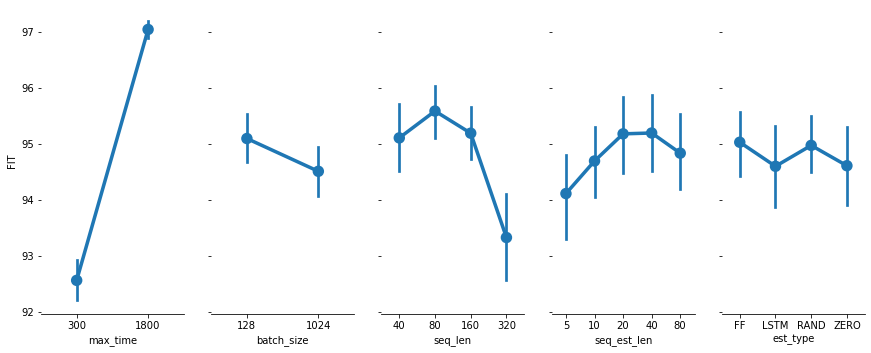

In [8]:
# Full results: main effects
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

# Biggest effect seems to be max_time

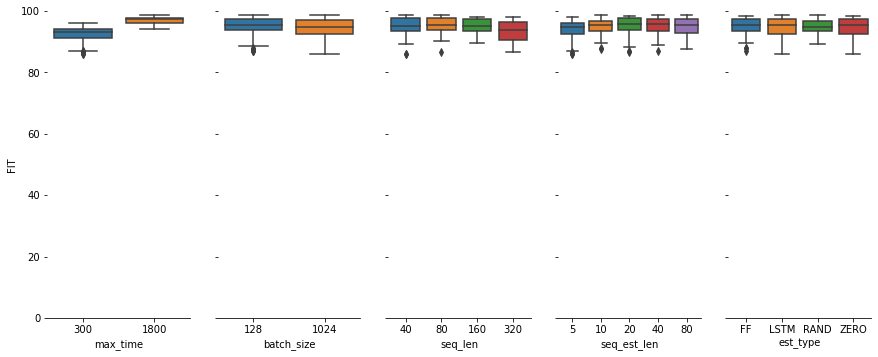

In [9]:
# Full results: main effects
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
g.set(ylim=(0, 100))
sns.despine(fig=g.fig, left=True)

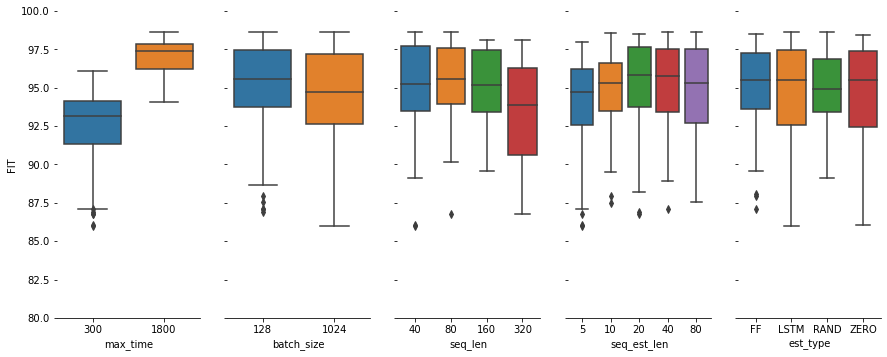

In [10]:
# Full results: main effects
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
g.set(ylim=(80, 100))
sns.despine(fig=g.fig, left=True)

In [35]:
fig = make_subplots(rows=1, cols=5)
for idx, factor in enumerate(factors):
    aa=fig.add_box(y=df_res["FIT"], x=df_res[factor], row=1, col=idx+1, name=factor)#, label="a") 
    fig.update_yaxes(range=[80, 100], row=1, col=idx+1)
fig.show()

In [12]:
#fig.select_xaxes

In [13]:
df_res.groupby("seq_len")["FIT"].agg(["median", "mean", "std"])
#df_res.groupby("lr")["FIT"].agg(["mean", "std"])

,median,mean,std
seq_len,,,
40,95.223083,95.105875,2.788881
80,95.553341,95.585624,2.175620
160,95.179363,95.189996,2.183911
320,93.866467,93.325585,3.491266


In [14]:
#pd.pivot_table(df_res, index=["seq_len"], columns=["est_type"])

In [15]:
fig = px.scatter(df_res, y="FIT",
                 facet_col="est_type", facet_row="est_direction", color="seq_len",
                 hover_data=["max_time", "seq_est_len"])
fig.show()

In [16]:
df_30min = df_res[(df_res["max_time"] != 300)]

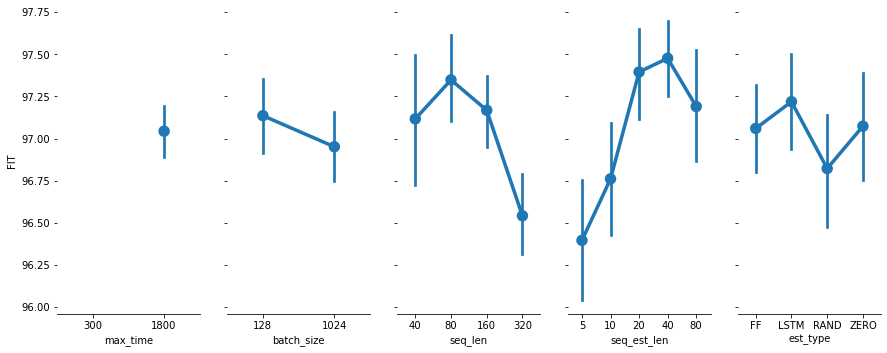

In [17]:
# Full results: main effects
g = sns.PairGrid(df_30min, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

In [18]:
df_zero= df_res[(df_res["max_time"] != 300) & ((df_res["est_type"] == "ZERO"))]

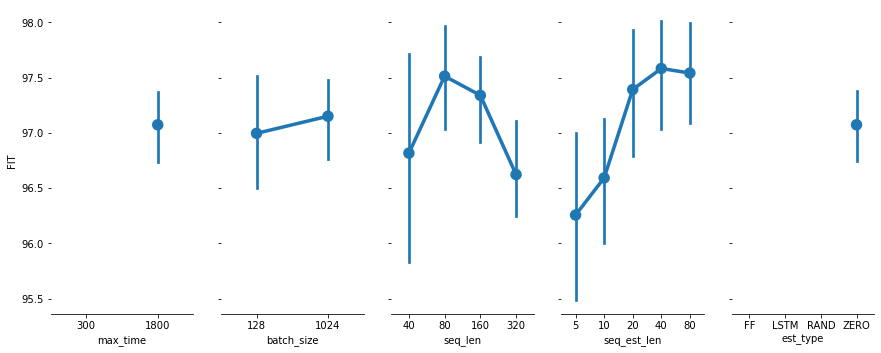

In [19]:
# Full results: main effects
g = sns.PairGrid(df_zero, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

In [20]:
df_5min = df_res[(df_res["max_time"] == 300)]

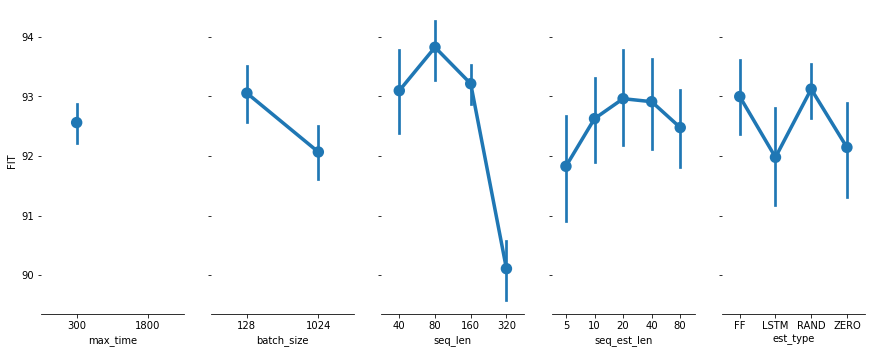

In [21]:
# Full results: main effects
g = sns.PairGrid(df_5min, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

In [22]:
df_good = df_res[(df_res["max_time"] != 300) & (df_res["est_type"]== "FF")]

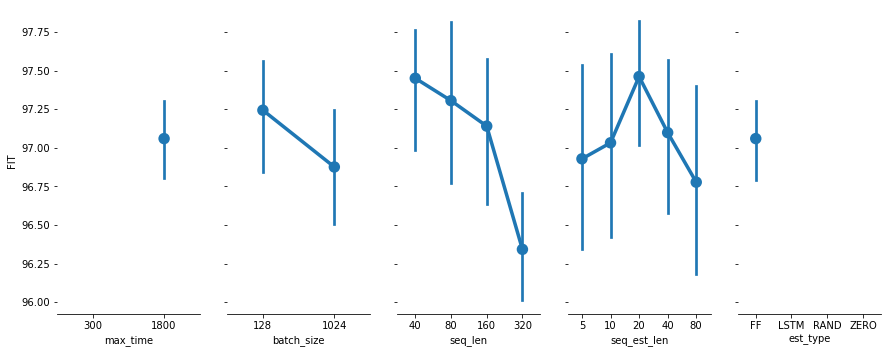

In [23]:
# Full results: main effects
g = sns.PairGrid(df_good, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

In [24]:
fig = px.scatter(df_30min, y="FIT",
                 facet_col="est_type", facet_row="est_direction", color="seq_len",
                 hover_data=["max_time", "seq_est_len"])
fig.show()

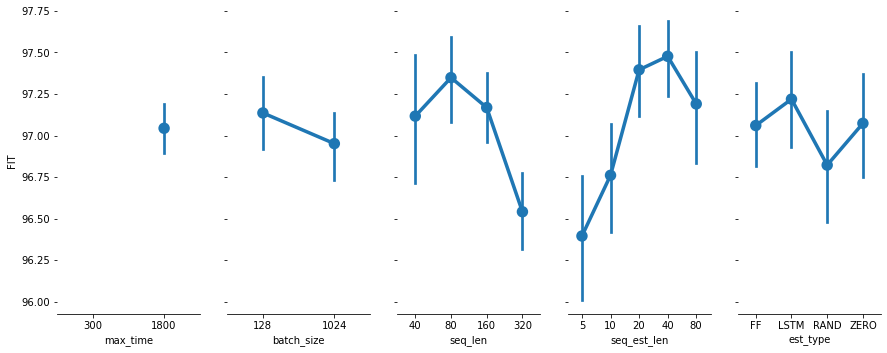

In [25]:
# Full results: main effects
g = sns.PairGrid(df_30min, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

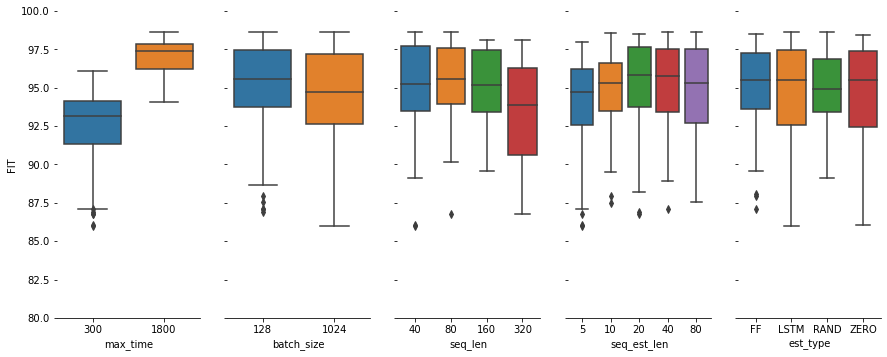

In [26]:
# Full results: main effects
g = sns.PairGrid(df_res, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
g.set(ylim=(80, 100))
sns.despine(fig=g.fig, left=True)

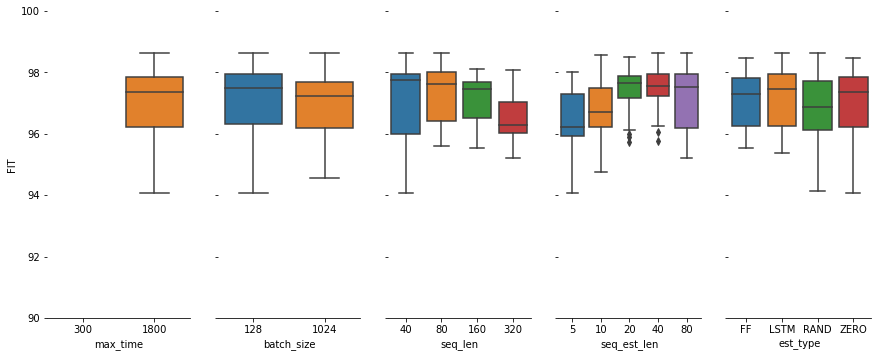

In [27]:
# Full results: main effects
g = sns.PairGrid(df_30min, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
g.set(ylim=(90, 100))
sns.despine(fig=g.fig, left=True)

In [28]:
df_5min.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
149,272,0.001,10000,300,128,40,20,forward,RAND,15,281,96.115372,9.289994
41,48,0.001,10000,300,128,40,40,forward,LSTM,15,74,95.732155,10.206436
307,288,0.001,10000,300,128,40,40,forward,RAND,15,289,95.653473,10.394597
21,192,0.001,10000,300,128,40,20,forward,ZERO,15,10,95.600990,10.520106
2,212,0.001,10000,300,128,80,40,forward,ZERO,15,218,95.505180,10.749226
51,116,0.001,10000,300,128,80,20,forward,FF,15,35,95.474228,10.823257
105,180,0.001,10000,300,128,80,10,forward,ZERO,15,19,95.470009,10.833365
224,68,0.001,10000,300,128,80,80,forward,LSTM,15,5,95.436821,10.912728
254,20,0.001,10000,300,128,80,10,forward,LSTM,15,286,95.413406,10.968713
10,196,0.001,10000,300,128,80,20,forward,ZERO,15,41,95.321213,11.189187


In [29]:
df_short_est = df_res[(df_res["seq_est_len"] == 10)]
df_short_est.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
33,17,0.001,10000,1800,128,40,10,forward,LSTM,15,271,98.573456,3.411554
84,103,0.001,10000,1800,1024,80,10,forward,FF,15,311,98.476807,3.642673
240,105,0.001,10000,1800,128,160,10,forward,FF,15,54,97.878464,5.073600
253,97,0.001,10000,1800,128,40,10,forward,FF,15,262,97.818047,5.218078
86,27,0.001,10000,1800,1024,160,10,forward,LSTM,15,7,97.728607,5.431982
67,21,0.001,10000,1800,128,80,10,forward,LSTM,15,158,97.717194,5.459263
15,19,0.001,10000,1800,1024,40,10,forward,LSTM,15,26,97.601913,5.734950
62,25,0.001,10000,1800,128,160,10,forward,LSTM,15,200,97.484001,6.016933
136,181,0.001,10000,1800,128,80,10,forward,ZERO,15,273,97.474838,6.038855
17,191,0.001,10000,1800,1024,320,10,forward,ZERO,15,86,97.387650,6.247364


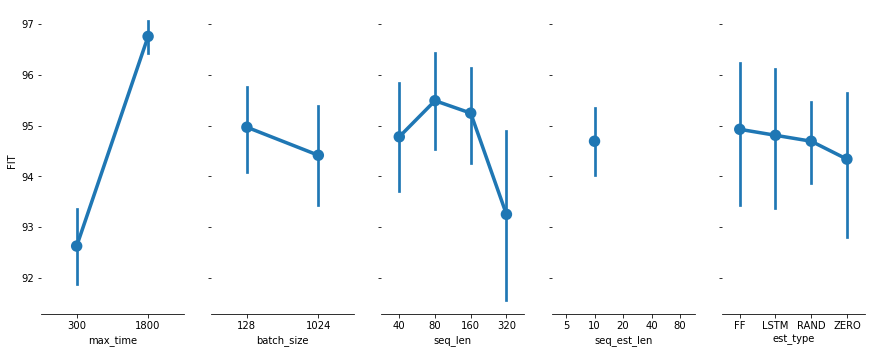

In [30]:

# Full results: main effects
g = sns.PairGrid(df_short_est, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.pointplot, scale=1.3)
sns.despine(fig=g.fig, left=True)

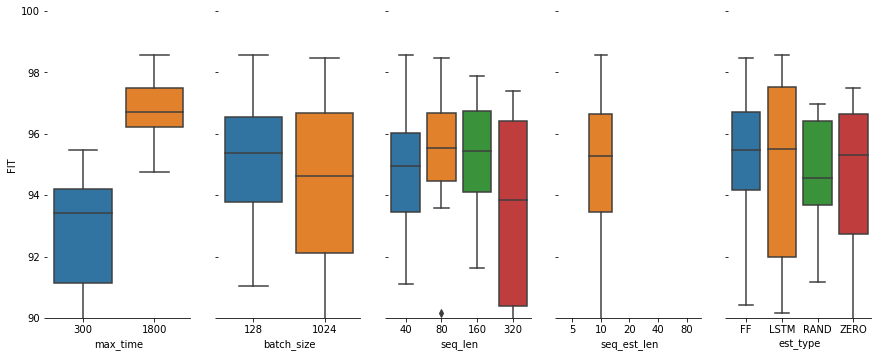

In [31]:
# Full results: main effects
g = sns.PairGrid(df_short_est, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
g.set(ylim=(90, 100))
sns.despine(fig=g.fig, left=True)

In [32]:
df_short_train = df_res[(df_res["seq_len"] == 40) & (df_res["seq_est_len"] == 10)]
df_short_train.head(20)

,experiment_id,lr,epochs,max_time,batch_size,seq_len,seq_est_len,est_direction,est_type,est_hidden_size,seed,FIT,RMSE
33,17,0.001,10000,1800,128,40,10,forward,LSTM,15,271,98.573456,3.411554
253,97,0.001,10000,1800,128,40,10,forward,FF,15,262,97.818047,5.218078
15,19,0.001,10000,1800,1024,40,10,forward,LSTM,15,26,97.601913,5.734950
191,99,0.001,10000,1800,1024,40,10,forward,FF,15,89,97.181290,6.740870
243,179,0.001,10000,1800,1024,40,10,forward,ZERO,15,219,95.657089,10.385967
150,96,0.001,10000,300,128,40,10,forward,FF,15,213,95.317520,11.198032
112,257,0.001,10000,1800,128,40,10,forward,RAND,15,290,95.233986,11.397807
90,177,0.001,10000,1800,128,40,10,forward,ZERO,15,296,95.150246,11.598061
137,259,0.001,10000,1800,1024,40,10,forward,RAND,15,203,94.742203,12.573879
57,16,0.001,10000,300,128,40,10,forward,LSTM,15,122,93.951973,14.463695


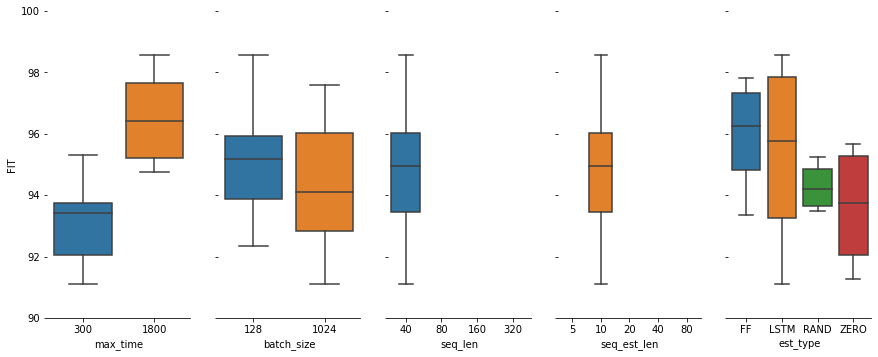

In [33]:
# Full results: main effects
g = sns.PairGrid(df_short_train, y_vars=response,
                 x_vars=factors,
                 height=5, aspect=.5)
g.map(sns.boxplot)
g.set(ylim=(90, 100))
sns.despine(fig=g.fig, left=True)